# Intensivao de Python - Aula3

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r'advertising.csv')
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV        200 non-null float64
Radio     200 non-null float64
Jornal    200 non-null float64
Vendas    200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

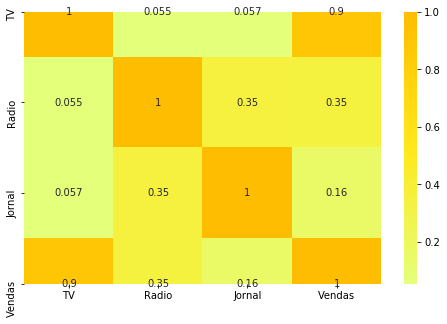

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Wistia', center=True)
plt.show()

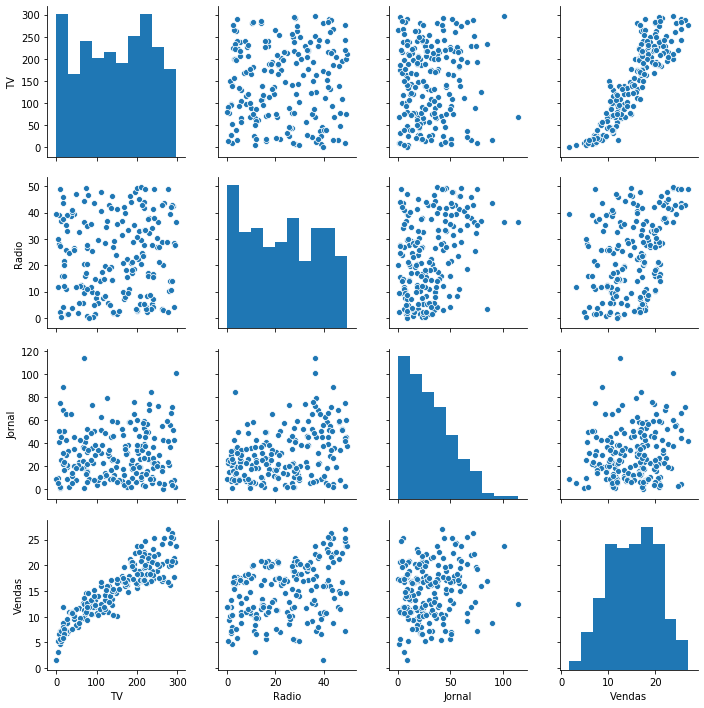

In [28]:
sns.pairplot(df)
plt.show()

In [36]:
#divisao do dataframe
from sklearn.model_selection import train_test_split

#bibliotecas de modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#teste dos resultados dos modelos
from sklearn import metrics

In [31]:
y = df['Vendas']
X = df.drop('Vendas', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
modelo_regression = LinearRegression()
modelo_treedecision = RandomForestRegressor()

modelo_regression.fit(X_train, y_train)
modelo_treedecision.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
previsao_regression = modelo_regression.predict(X_test)
previsao_treedecision = modelo_treedecision.predict(X_test)

print(metrics.r2_score(y_test, previsao_regression))
print(metrics.r2_score(y_test, previsao_treedecision))

0.9071151423684273
0.9645409898690962


In [48]:
df_valores = pd.DataFrame({'TV':[130, 80, 70], 'Radio':[10, 5, 7], 'Jornal':[5, 4, 3]})

In [49]:
df_valores

,TV,Radio,Jornal
0,130,10,5
1,80,5,4
2,70,7,3


In [50]:
modelo_regression.predict(df_valores)

array([12.83211376,  9.56987485,  9.22616283])

In [51]:
modelo_treedecision.predict(df_valores)

array([12.504, 12.057, 11.667])

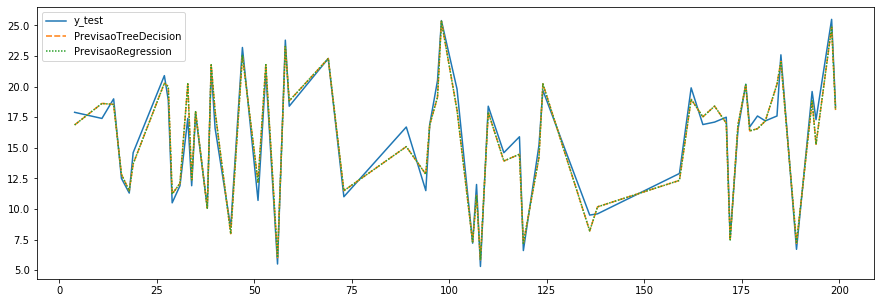

In [46]:
df_auxiliar = pd.DataFrame()
df_auxiliar['y_test'] = y_test
df_auxiliar['PrevisaoTreeDecision'] = previsao_treedecision
df_auxiliar['PrevisaoRegression'] = previsao_treedecision

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_auxiliar)
plt.show()

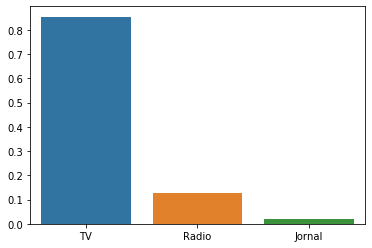

In [47]:
sns.barplot(x=X_train.columns, y=modelo_treedecision.feature_importances_)
plt.show()